<a href="https://colab.research.google.com/github/irham235/Belajar-machine-learning/blob/main/projek_akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import os
print(tf.__version__)

2.14.0


mempersiapkan dataset

In [120]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip \
  -o /tmp/rockpaperscissors.zip

In [121]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [122]:
os.listdir('/tmp/rockpaperscissors')

['rps-cv-images', 'README_rpc-cv-images.txt', 'paper', 'rock', 'scissors']

In [123]:
import splitfolders
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
#splitfolders.ratio(base_dir, output = '/tmp/rockpaperscissors', seed = 1337, ratio = (.6, .4,))

#train_dir = os.path.join('/tmp/rockpaperscissors', 'train')
#validation_dir = os.path.join('/tmp/rockpaperscissors', 'val')

In [124]:
rock_dir = os.path.join (base_dir, 'rock')
paper_dir = os.path.join (base_dir, 'paper')
scissors_dir = os.path.join (base_dir, 'scissors')

In [125]:
# jika menggunakan train test split tetapi hasilnya akan 1312 | 876
#train_rock_dir, val_rock_dir = train_test_split (os.listdir (rock_dir), test_size = 0.4)
#train_paper_dir, val_paper_dir = train_test_split (os.listdir (paper_dir), test_size = 0.4)
#train_scissors_dir, val_scissors_dir = train_test_split (os.listdir (scissors_dir), test_size = 0.4)

In [126]:
# jika menggunakan train test split tetapi hasilnya akan 1312 | 876
#train_rock = os.path.join (train_dir, 'rock')
#train_paper = os.path.join (train_dir, 'paper')
#train_scissors = os.path.join (train_dir, 'scissors')
#val_rock = os.path.join (validation_dir, 'rock')
#val_paper = os.path.join (validation_dir, 'scissors')
#val_scissors = os.path.join (validation_dir, 'scissors')

In [127]:
train_datagen = ImageDataGenerator(
  rescale = 1./225,
  rotation_range = 20,
  horizontal_flip = True,
  shear_range = 0.2,
  fill_mode = 'nearest',
  validation_split =0.4
)

test_datagen = ImageDataGenerator(
  rescale = 1./225,
  rotation_range = 20,
  horizontal_flip = True,
  shear_range = 0.2,
  fill_mode = 'nearest',
  validation_split =0.4
)

train_generator = train_datagen.flow_from_directory(
  base_dir,
  target_size =(150,150),
  batch_size = 32,
  class_mode = 'categorical',
  subset='training'
)

validation_generator = test_datagen.flow_from_directory(
  base_dir,
  target_size = (150,150),
  batch_size = 32,
  class_mode = 'categorical',
  subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


membangun model

In [128]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [129]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

melakukan compile model

In [130]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [131]:
# latih model dengan model.fit
model.fit(
    train_generator,
    steps_per_epoch=25, # berapa batch yang akan dieksekusi pada setiap epoch
    epochs=20, # tambahkan epochs jika akurasi model belum optimal
    validation_data=validation_generator, # menampilkan akurasu pengujian data validasi
    validation_steps=5, # berapa batch yang akan dieksekusi pada setiap epoch
    verbose=2
)

Epoch 1/20
25/25 - 73s - loss: 1.0943 - accuracy: 0.4075 - val_loss: 1.0176 - val_accuracy: 0.4313 - 73s/epoch - 3s/step
Epoch 2/20
25/25 - 73s - loss: 0.6541 - accuracy: 0.7416 - val_loss: 0.3812 - val_accuracy: 0.8625 - 73s/epoch - 3s/step
Epoch 3/20
25/25 - 67s - loss: 0.3312 - accuracy: 0.8925 - val_loss: 0.2672 - val_accuracy: 0.8875 - 67s/epoch - 3s/step
Epoch 4/20
25/25 - 69s - loss: 0.2540 - accuracy: 0.9137 - val_loss: 0.1429 - val_accuracy: 0.9563 - 69s/epoch - 3s/step
Epoch 5/20
25/25 - 68s - loss: 0.2007 - accuracy: 0.9337 - val_loss: 0.2660 - val_accuracy: 0.9187 - 68s/epoch - 3s/step
Epoch 6/20
25/25 - 72s - loss: 0.1777 - accuracy: 0.9438 - val_loss: 0.3572 - val_accuracy: 0.8687 - 72s/epoch - 3s/step
Epoch 7/20
25/25 - 67s - loss: 0.1840 - accuracy: 0.9364 - val_loss: 0.1725 - val_accuracy: 0.9500 - 67s/epoch - 3s/step
Epoch 8/20
25/25 - 74s - loss: 0.1157 - accuracy: 0.9494 - val_loss: 0.2458 - val_accuracy: 0.9000 - 74s/epoch - 3s/step
Epoch 9/20
25/25 - 66s - loss: 0

Saving images.jpeg to images.jpeg
1/1 [==============================] - 0s 172ms/step
images.jpeg
Paper


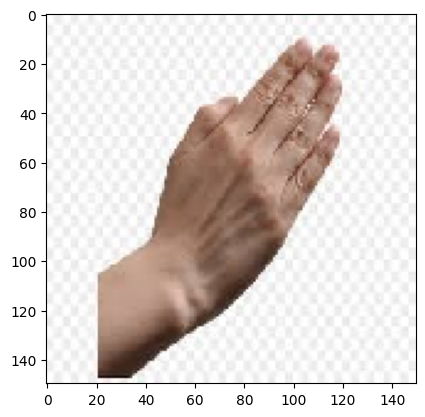

In [132]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1:
    print('Rock')
  elif classes[0][2]==1:
    print('Scissor')